In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

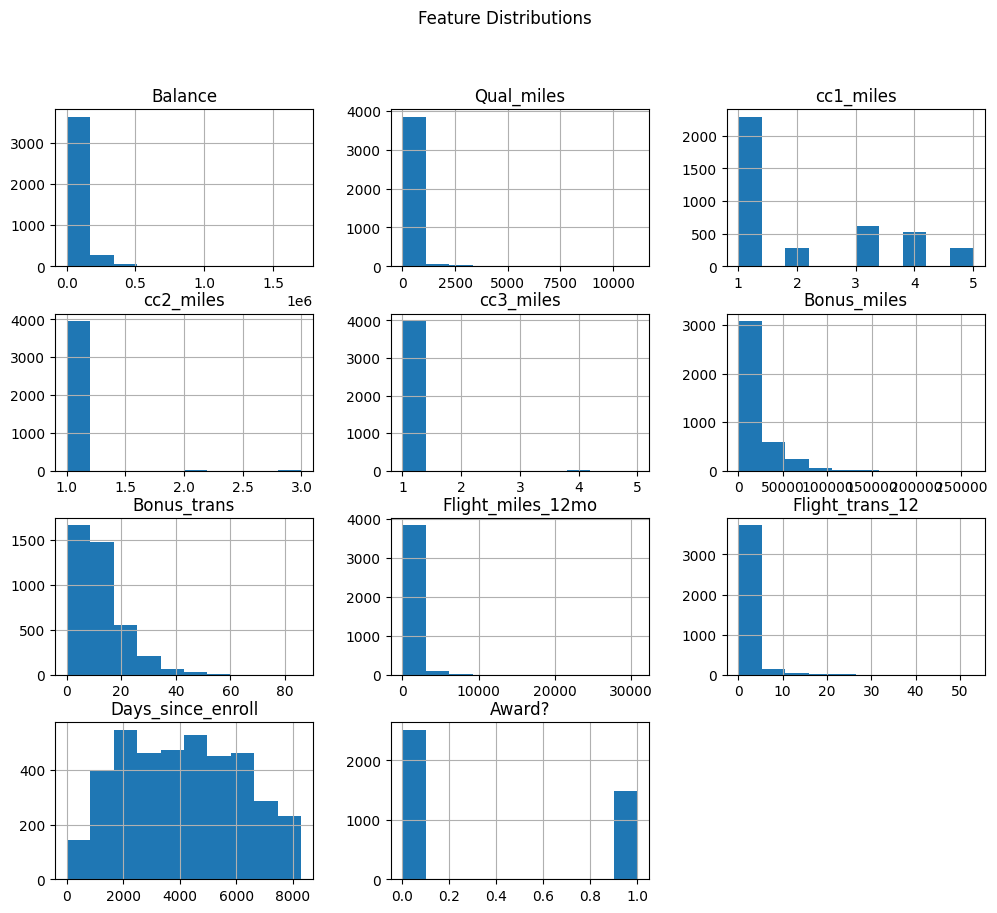

In [3]:
# Load the dataset
df = pd.read_csv('EastWestAirlines.csv')
df = df.drop('ID#', axis=1)  # Drop ID column if present

# EDA: Visualize distributions
df.describe().T
df.hist(figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()

In [4]:
# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

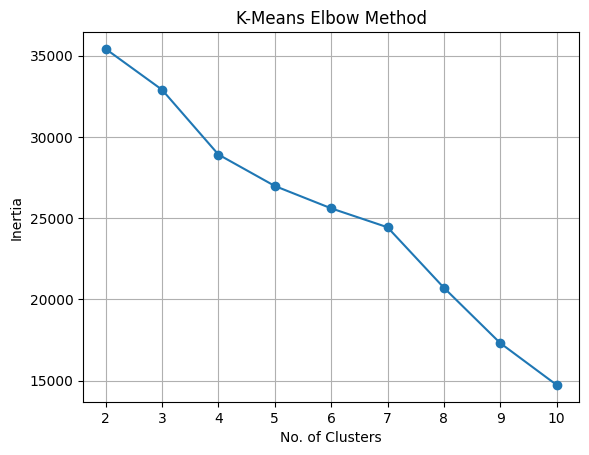

In [5]:
# K-MEANS Clustering
# ---------------------
inertia = []
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))
# Elbow Plot
plt.plot(range(2, 11), inertia, marker='o')
plt.title("K-Means Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

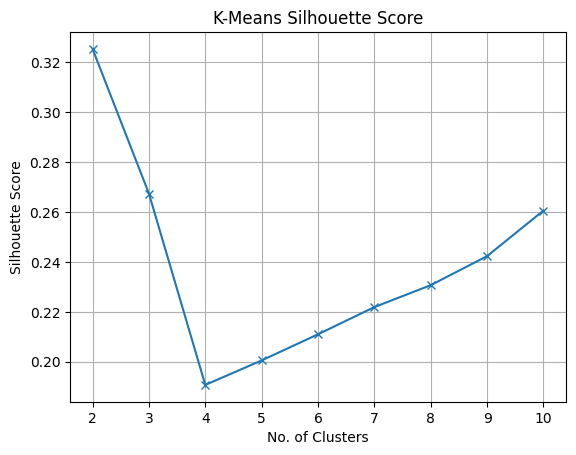

In [6]:
# Silhouette Scores
plt.plot(range(2, 11), sil_scores, marker='x')
plt.title("K-Means Silhouette Score")
plt.xlabel("No. of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

In [7]:
# Final KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

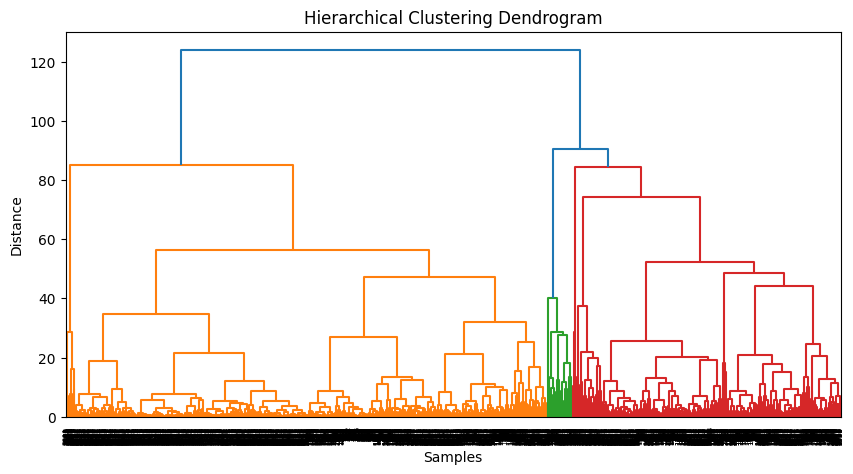

In [8]:
# HIERARCHICAL Clustering
# ---------------------
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)
df['Hierarchical_Cluster'] = hc_labels

In [12]:
# DBSCAN Clustering

dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

In [14]:
# Silhouette Scores

print("Silhouette Score - KMeans:", silhouette_score(X_scaled, kmeans_labels))
print("Silhouette Score - Hierarchical:", silhouette_score(X_scaled, hc_labels))
print("Silhouette Score - DBSCAN:", silhouette_score(X_scaled, dbscan_labels[df['DBSCAN_Cluster']]))

Silhouette Score - KMeans: 0.19071186813310886
Silhouette Score - Hierarchical: 0.30814152852022786
Silhouette Score - DBSCAN: 0.5115001292822889


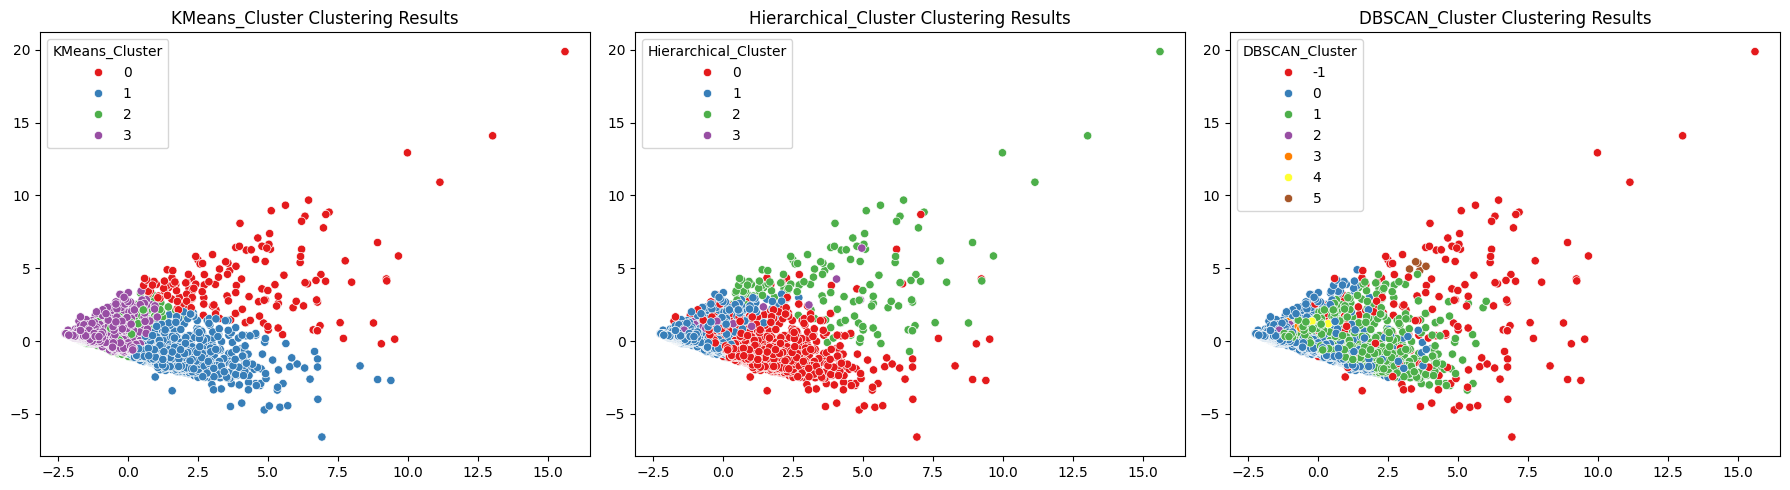

In [11]:
# Visualization (2D PCA)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(18, 5))

for i, label in enumerate(['KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster']):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df[label], palette='Set1')
    plt.title(f'{label} Clustering Results')

plt.tight_layout()
plt.show()